In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import time

In [2]:
def face_for_yawn(direc="./datasets"):
    IMG_SIZE = 48
    categories = ["no_yawn", "yawn"]
    yaw_no = []
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num = categories.index(category)
        print(path_link)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.COLOR_BGR2GRAY)
            face_cascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt.xml")
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                roi_color = image_array[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE,IMG_SIZE))
                yaw_no.append([resized_array, class_num])
    return yaw_no

In [3]:
def get_data(direc="./datasets"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 48
    data = []
    for label in labels:
        path = os.path.join(direc, label)
        class_num = labels.index(label)
        class_num +=2
        print(path)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2GRAY)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
    return data

In [4]:
def append_data():
    yawn_or_no = face_for_yawn()
    data = get_data()
    yawn_or_no.extend(data)
    return np.array(yawn_or_no, dtype=object)

In [5]:
new_data = append_data()

./datasets\no_yawn
./datasets\yawn
./datasets\Closed
./datasets\Open


In [6]:
x = []
y = []
for feature, label in new_data:
    x.append(feature)
    y.append(label)

In [7]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
y = np.array(y)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
x, y = np.array(x), np.array(y)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1/255, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(x_train), y_train, shuffle=True)
test_generator = test_generator.flow(np.array(x_test), y_test, shuffle=True)

In [11]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import *

model = Sequential()
model.add(Input(shape=x_train.shape[1:]))

model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='covn4', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='conv5', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='covn6', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='covn7', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv8', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv9', activation='relu'))
# # # model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv10', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='fc'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax', name='fc3'))

opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 48, 48, 32)        896       
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv3 (Conv2D)              (None, 24, 24, 64)        18496     
                                                                 
 covn4 (Conv2D)              (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [12]:
model_vgg50 = Sequential()
model_vgg50.add(Input(shape=x_train.shape[1:]))

model_vgg50.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu'))
model_vgg50.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu'))
model_vgg50.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg50.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
model_vgg50.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='covn4', activation='relu'))
model_vgg50.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg50.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='conv5', activation='relu'))
model_vgg50.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='covn6', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='covn7', activation='relu'))
model_vgg50.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg50.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv8', activation='relu'))
model_vgg50.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv9', activation='relu'))
# # # model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv10', activation='relu'))
model_vgg50.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg50.add(Flatten())
model_vgg50.add(Dense(128, activation='relu', name='fc'))
model_vgg50.add(Dropout(0.2))
model_vgg50.add(Dense(128, activation='relu', name='fc2'))
model_vgg50.add(Dropout(0.1))
model_vgg50.add(Dense(4, activation='softmax', name='fc3'))

opt_vgg50 = Adam(learning_rate=0.001)
model_vgg50.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_vgg50)

model_vgg50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 48, 48, 32)        896       
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 24, 24, 64)        18496     
                                                                 
 covn4 (Conv2D)              (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [13]:
model_vgg100 = Sequential()
model_vgg100.add(Input(shape=x_train.shape[1:]))

model_vgg100.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu'))
model_vgg100.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu'))
model_vgg100.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg100.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
model_vgg100.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='covn4', activation='relu'))
model_vgg100.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg100.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='conv5', activation='relu'))
model_vgg100.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='covn6', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='covn7', activation='relu'))
model_vgg100.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg100.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv8', activation='relu'))
model_vgg100.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv9', activation='relu'))
# # # model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='conv10', activation='relu'))
model_vgg100.add(MaxPool2D((2, 2), strides=(2, 2)))

model_vgg100.add(Flatten())
model_vgg100.add(Dense(128, activation='relu', name='fc'))
model_vgg100.add(Dropout(0.2))
model_vgg100.add(Dense(128, activation='relu', name='fc2'))
model_vgg100.add(Dropout(0.1))
model_vgg100.add(Dense(4, activation='softmax', name='fc3'))

opt_vgg100 = Adam(learning_rate=0.001)
model_vgg100.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_vgg100)

model_vgg100.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 48, 48, 32)        896       
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 24, 24, 64)        18496     
                                                                 
 covn4 (Conv2D)              (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [14]:
model_le = Sequential()

model_le.add(Input(shape=x_train.shape[1:]))
model_le.add(Conv2D(6, (5, 5), padding='same', strides=(1, 1), name='conv_le1', activation='tanh'))
model_le.add(AveragePooling2D((2, 2), padding='valid', strides=(2, 2), name='pool_le1'))
model_le.add(Conv2D(16, (5, 5), padding='valid', strides=(1, 1), name='conv_le2', activation='tanh'))
model_le.add(AveragePooling2D((2, 2), padding='valid', strides=(2, 2), name='pool_le2'))
model_le.add(Conv2D(120, (5, 5), padding='valid', strides=(1, 1), name='conv_le3', activation='tanh'))

model_le.add(Flatten())

model_le.add(Dense(84, activation = "tanh"))
model_le.add(Dense(4, activation = "softmax"))

opt_le = Adam(learning_rate=0.0001)

model_le.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_le)

model_le.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_le1 (Conv2D)           (None, 48, 48, 6)         456       
                                                                 
 pool_le1 (AveragePooling2D)  (None, 24, 24, 6)        0         
                                                                 
 conv_le2 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 pool_le2 (AveragePooling2D)  (None, 10, 10, 16)       0         
                                                                 
 conv_le3 (Conv2D)           (None, 6, 6, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 4320)              0         
                                                                 
 dense (Dense)               (None, 84)               

In [15]:
model_le_50 = Sequential()

model_le_50.add(Input(shape=x_train.shape[1:]))
model_le_50.add(Conv2D(6, (5, 5), padding='same', strides=(1, 1), name='conv_le1', activation='tanh'))
model_le_50.add(AveragePooling2D((2, 2), padding='valid', strides=(2, 2), name='pool_le1'))
model_le_50.add(Conv2D(16, (5, 5), padding='valid', strides=(1, 1), name='conv_le2', activation='tanh'))
model_le_50.add(AveragePooling2D((2, 2), padding='valid', strides=(2, 2), name='pool_le2'))
model_le_50.add(Conv2D(120, (5, 5), padding='valid', strides=(1, 1), name='conv_le3', activation='tanh'))

model_le_50.add(Flatten())

model_le_50.add(Dense(84, activation = "tanh"))
model_le_50.add(Dense(4, activation = "softmax"))

opt_le_50 = Adam(learning_rate=0.0001)

model_le_50.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_le_50)

model_le_50.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_le1 (Conv2D)           (None, 48, 48, 6)         456       
                                                                 
 pool_le1 (AveragePooling2D)  (None, 24, 24, 6)        0         
                                                                 
 conv_le2 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 pool_le2 (AveragePooling2D)  (None, 10, 10, 16)       0         
                                                                 
 conv_le3 (Conv2D)           (None, 6, 6, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 4320)              0         
                                                                 
 dense_2 (Dense)             (None, 84)               

In [16]:
model_le_100 = Sequential()

model_le_100.add(Input(shape=x_train.shape[1:]))
model_le_100.add(Conv2D(6, (5, 5), padding='same', strides=(1, 1), name='conv_le1', activation='tanh'))
model_le_100.add(AveragePooling2D((2, 2), padding='valid', strides=(2, 2), name='pool_le1'))
model_le_100.add(Conv2D(16, (5, 5), padding='valid', strides=(1, 1), name='conv_le2', activation='tanh'))
model_le_100.add(AveragePooling2D((2, 2), padding='valid', strides=(2, 2), name='pool_le2'))
model_le_100.add(Conv2D(120, (5, 5), padding='valid', strides=(1, 1), name='conv_le3', activation='tanh'))

model_le_100.add(Flatten())

model_le_100.add(Dense(84, activation = "tanh"))
model_le_100.add(Dense(4, activation = "softmax"))

opt_le_100 = Adam(learning_rate=0.0001)

model_le_100.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_le_100)

model_le_100.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_le1 (Conv2D)           (None, 48, 48, 6)         456       
                                                                 
 pool_le1 (AveragePooling2D)  (None, 24, 24, 6)        0         
                                                                 
 conv_le2 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 pool_le2 (AveragePooling2D)  (None, 10, 10, 16)       0         
                                                                 
 conv_le3 (Conv2D)           (None, 6, 6, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 4320)              0         
                                                                 
 dense_4 (Dense)             (None, 84)               

In [17]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer_vgg_35 = ModelCheckpoint(filepath='model.weightsvgg_non_gpu_35.best.hdf5', verbose=1, 
                               save_best_only=True)
checkpointer_le_35 = ModelCheckpoint(filepath='model_le.weightsle_non_gpu_35.best.hdf5', verbose=1, 
                               save_best_only=True)

checkpointer_vgg_50 = ModelCheckpoint(filepath='model.weightsvgg_non_gpu_50.best.hdf5', verbose=1, 
                               save_best_only=True)
checkpointer_le_50 = ModelCheckpoint(filepath='model_le.weightsle_non_gpu_50.best.hdf5', verbose=1, 
                               save_best_only=True)

checkpointer_vgg_100 = ModelCheckpoint(filepath='model.weightsvgg_non_gpu_100.best.hdf5', verbose=1, 
                               save_best_only=True)
checkpointer_le_100 = ModelCheckpoint(filepath='model_le.weightsle_non_gpu_100.best.hdf5', verbose=1, 
                               save_best_only=True)

In [18]:
history = model.fit(train_generator, batch_size=30,
                 epochs=35, 
                 validation_data=(test_generator),
                 callbacks=checkpointer_vgg_35,
                 verbose = 1)

Epoch 1/35
45/45 [==============================] - ETA: 0s - loss: 1.1978 - accuracy: 0.3944
Epoch 1: val_loss improved from inf to 0.92970, saving model to model.weightsvgg_non_gpu_35.best.hdf5
45/45 [==============================] - 9s 166ms/step - loss: 1.1978 - accuracy: 0.3944 - val_loss: 0.9297 - val_accuracy: 0.4258
Epoch 2/35
45/45 [==============================] - ETA: 0s - loss: 1.0266 - accuracy: 0.4204
Epoch 2: val_loss did not improve from 0.92970
45/45 [==============================] - 7s 160ms/step - loss: 1.0266 - accuracy: 0.4204 - val_loss: 0.9777 - val_accuracy: 0.4342
Epoch 3/35
45/45 [==============================] - ETA: 0s - loss: 0.6063 - accuracy: 0.7298
Epoch 3: val_loss improved from 0.92970 to 0.27104, saving model to model.weightsvgg_non_gpu_35.best.hdf5
45/45 [==============================] - 7s 164ms/step - loss: 0.6063 - accuracy: 0.7298 - val_loss: 0.2710 - val_accuracy: 0.8880
Epoch 4/35
45/45 [==============================] - ETA: 0s - loss: 0.

In [ ]:
history_50 = model_vgg50.fit(train_generator, batch_size=30,
                 epochs=50, 
                 validation_data=(test_generator),
                 callbacks=checkpointer_vgg_50,
                 verbose = 1)

Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 1.1783 - accuracy: 0.3937
Epoch 1: val_loss improved from inf to 0.96758, saving model to model.weightsvgg_non_gpu_50.best.hdf5
45/45 [==============================] - 9s 173ms/step - loss: 1.1783 - accuracy: 0.3937 - val_loss: 0.9676 - val_accuracy: 0.4062
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.9270 - accuracy: 0.4765
Epoch 2: val_loss improved from 0.96758 to 0.80577, saving model to model.weightsvgg_non_gpu_50.best.hdf5
45/45 [==============================] - 8s 168ms/step - loss: 0.9270 - accuracy: 0.4765 - val_loss: 0.8058 - val_accuracy: 0.4902
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.5955 - accuracy: 0.7425
Epoch 3: val_loss improved from 0.80577 to 0.41952, saving model to model.weightsvgg_non_gpu_50.best.hdf5
45/45 [==============================] - 8s 167ms/step - loss: 0.5955 - accuracy: 0.7425 - val_loss: 0.4195 - val_accuracy: 0.8655
Epoch 4/50


In [ ]:
history_100 = model_vgg100.fit(train_generator, batch_size=30,
                 epochs=100, 
                 validation_data=(test_generator),
                 callbacks=checkpointer_vgg_100,
                 verbose = 1)

In [ ]:
history_le_35 = model_le.fit(train_generator, batch_size=30,
                 epochs=35, 
                 validation_data=(test_generator),
                 callbacks=checkpointer_le_35,
                 verbose = 1)

In [ ]:
history_le_50 = model_le_50.fit(train_generator, batch_size=30,
                 epochs=50, 
                 validation_data=(test_generator),
                 callbacks=checkpointer_le_50,
                 verbose = 1)

In [ ]:
history_le_100 = model_le_100.fit(train_generator, batch_size=30,
                 epochs=100, 
                 validation_data=(test_generator),
                 callbacks=checkpointer_le_100,
                 verbose = 1)

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

In [ ]:
model_vgg50.evaluate(x_test, y_test, verbose=1)

In [ ]:
model_vgg100.evaluate(x_test, y_test, verbose=1)

In [ ]:
model_le.evaluate(test_generator, verbose=1)

In [ ]:
model_le_50.evaluate(test_generator, verbose=1)

In [ ]:
model_le_100.evaluate(test_generator, verbose=1)

In [ ]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history["loss"], 'r-x', label = "train loss")

ax.plot(history.history["val_loss"], 'g-x', label = "validation loss")
ax.legend()
ax.set_title("Cross entropy loss")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history["accuracy"], "r-x", label = "train accuracy")
ax.plot(history.history["val_accuracy"], "g-x", label = "validation accuracy")
ax.legend()
ax.set_title("Accuracy")
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_50.history["loss"], 'r-x', label = "train loss")

ax.plot(history_50.history["val_loss"], 'g-x', label = "validation loss")
ax.legend()
ax.set_title("Cross entropy loss")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_50.history["accuracy"], "r-x", label = "train accuracy")
ax.plot(history_50.history["val_accuracy"], "g-x", label = "validation accuracy")
ax.legend()
ax.set_title("Accuracy")
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_100.history["loss"], 'r-x', label = "train loss")

ax.plot(history_100.history["val_loss"], 'g-x', label = "validation loss")
ax.legend()
ax.set_title("Cross entropy loss")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_100.history["accuracy"], "r-x", label = "train accuracy")
ax.plot(history_100.history["val_accuracy"], "g-x", label = "validation accuracy")
ax.legend()
ax.set_title("Accuracy")
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_le_35.history["loss"], 'r-x', label = "train loss")

ax.plot(history_le_35.history["val_loss"], 'g-x', label = "validation loss")
ax.legend()
ax.set_title("Cross entropy loss")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_le_35.history["accuracy"], "r-x", label = "train accuracy")
ax.plot(history_le_35.history["val_accuracy"], "g-x", label = "validation accuracy")
ax.legend()
ax.set_title("Accuracy")
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (18, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_le_50.history["loss"], 'r-x', label = "train loss")

ax.plot(history_le_50.history["val_loss"], 'g-x', label = "validation loss")
ax.legend()
ax.set_title("Cross entropy loss")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_le_50.history["accuracy"], "r-x", label = "train accuracy")
ax.plot(history_le_50.history["val_accuracy"], "g-x", label = "validation accuracy")
ax.legend()
ax.set_title("Accuracy")
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_le_100.history["loss"], 'r-x', label = "train loss")

ax.plot(history_le_100.history["val_loss"], 'g-x', label = "validation loss")
ax.legend()
ax.set_title("Cross entropy loss")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_le_100.history["accuracy"], "r-x", label = "train accuracy")
ax.plot(history_le_100.history["val_accuracy"], "g-x", label = "validation accuracy")
ax.legend()
ax.set_title("Accuracy")
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(1, 2, 1)

epochs = range(1, len(history.history["val_loss"]) + 1)  # Data nilai epoch

ax.plot(epochs, history.history["val_loss"], color='blue', linestyle='-', marker='x', label="VGG Validation Loss")
ax.plot(epochs, history_le_35.history["val_loss"], color='purple', linestyle='-', marker='x', label = "LeNet Validation Loss")
ax.legend(prop={'size': 14})
ax.legend()
ax.set_title("Cross entropy loss dari kedua model, epoch 35", fontsize=14)
ax.set_xlabel("Epochs")  # Memberi label pada sumbu x
ax.set_ylabel("Loss")  # Memberi label pada sumbu y
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(epochs, history.history["val_accuracy"], color='blue', linestyle='-', marker='x', label = "VGG Validation Accuracy")
ax.plot(epochs, history_le_35.history["val_accuracy"], color='purple', linestyle='-', marker='x',label = "LeNet Validation Accuracy")
ax.set_xlabel("Epochs")  # Memberi label pada sumbu x
ax.set_ylabel("Accuracy")  # Memberi label pada sumbu y
ax.legend(prop={'size': 14})
ax.legend()
ax.set_title("Accuracy dari kedua model, epoch 35", fontsize=14)
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (18, 6))
ax = fig.add_subplot(1, 2, 1)

epochs = range(1, len(history_50.history["val_loss"]) + 1)  # Data nilai epoch

ax.plot(epochs, history_50.history["val_loss"], color='blue', linestyle='-', marker='x', label="VGG Validation Loss")
ax.plot(epochs, history_le_50.history["val_loss"], color='purple', linestyle='-', marker='x', label = "LeNet Validation Loss")
ax.legend(prop={'size': 14})
ax.legend()
ax.set_title("Cross entropy loss dari kedua model, epoch 50", fontsize=14)
ax.set_xlabel("Epochs")  # Memberi label pada sumbu x
ax.set_ylabel("Loss")  # Memberi label pada sumbu y
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(epochs, history_50.history["val_accuracy"], color='blue', linestyle='-', marker='x', label = "VGG Validation Accuracy")
ax.plot(epochs, history_le_50.history["val_accuracy"], color='purple', linestyle='-', marker='x',label = "LeNet Validation Accuracy")
ax.set_xlabel("Epochs")  # Memberi label pada sumbu x
ax.set_ylabel("Accuracy")  # Memberi label pada sumbu y
ax.legend(prop={'size': 14})
ax.legend()
ax.set_title("Accuracy dari kedua model, epoch 50", fontsize=14)
ax.grid(True)

In [ ]:
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot(1, 2, 1)

epochs = range(1, len(history_100.history["val_loss"]) + 1)  # Data nilai epoch

ax.plot(epochs, history_100.history["val_loss"], color='blue', linestyle='-', marker='x', label="VGG Validation Loss")
ax.plot(epochs, history_le_100.history["val_loss"], color='purple', linestyle='-', marker='x', label = "LeNet Validation Loss")
ax.legend(prop={'size': 14})
ax.legend()
ax.set_title("Cross entropy loss dari kedua model, epoch 100", fontsize=14)
ax.set_xlabel("Epochs")  # Memberi label pada sumbu x
ax.set_ylabel("Loss")  # Memberi label pada sumbu y
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(epochs, history_100.history["val_accuracy"], color='blue', linestyle='-', marker='x', label = "VGG Validation Accuracy")
ax.plot(epochs, history_le_100.history["val_accuracy"], color='purple', linestyle='-', marker='x',label = "LeNet Validation Accuracy")
ax.set_xlabel("Epochs")  # Memberi label pada sumbu x
ax.set_ylabel("Accuracy")  # Memberi label pada sumbu y
ax.legend(prop={'size': 14})
ax.legend()
ax.set_title("Accuracy dari kedua model, epoch 100", fontsize=14)
ax.grid(True)

In [1]:
# tensorflow.saved_model.save(model, './test')
model.save('drowsiness_vgg_non_gpu_35.h5')
model_vgg50.save('drowsiness_vgg_non_gpu_50.h5')
model_vgg100.save('drowsiness_vgg_non_gpu_100.h5')

NameError: name 'model' is not defined

In [ ]:
model_le.save('drowsiness_le_non_gpu_35.h5')
model_le_50.save('drowsiness_le_non_gpu_50.h5')
model_le_100.save('drowsiness_le_non_gpu_100.h5')


In [1]:
from tensorflow.keras.models import load_model
import numpy as np
model_vgg_35 = load_model('drowsiness_vgg_non_gpu_35.h5')
model_vgg_50 = load_model('drowsiness_vgg_non_gpu_50.h5')
model_vgg_100 = load_model('drowsiness_vgg_non_gpu_100.h5')

model_lenet_35 = load_model('drowsiness_le_non_gpu_35.h5')
model_lenet_50 = load_model('drowsiness_le_non_gpu_50.h5')
model_lenet_100 = load_model('drowsiness_le_non_gpu_100.h5')


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
y_test = np.argmax(y_test, axis=1)

NameError: name 'y_test' is not defined

In [ ]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([TP, FN, FP, TN])

In [ ]:
def confusion_matrix_score(tp, fn, fp, tn):
    akurasi = ((tp + tn) / (tp + fp + fn + tn)) * 100
    presisi = (tp / (tp + fp)) * 100
    recall = (tp / (tp + fn)) * 100
    return akurasi, presisi, recall

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#VGG_35
y_pred_vgg35 = np.argmax(model_vgg_35.predict(x_test), axis=1)
cm_vgg35 = confusion_matrix(y_test, y_pred_vgg35)

In [ ]:
import seaborn as sns

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg35, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix VGG 35')
plt.show()


In [ ]:
lst_vgg35 = []

for cls in range(cm_vgg35.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg35).ravel()
    lst_vgg35.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg35)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg35[i][0], lst_vgg35[i][1], lst_vgg35[i][2], lst_vgg35[i][3])
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

In [ ]:
y_pred_le35 = np.argmax(model_lenet_35.predict(x_test), axis=1)
cm_le35 = confusion_matrix(y_test, y_pred_le35)
print(cm_le35)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_le35, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix LeNet 35')
plt.show()

In [ ]:
lst_le35 = []

for cls in range(cm_le35.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le35).ravel()
    lst_le35.append([TP, FN, FP, TN])
    
for i in range(len(lst_le35)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_le35[i][0], lst_le35[i][1], lst_le35[i][2], lst_le35[i][3])
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

In [ ]:
y_pred_vgg50 = np.argmax(model_vgg_50.predict(x_test), axis=1)
cm_vgg50 = confusion_matrix(y_test, y_pred_vgg50)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg50, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix VGG 50')
plt.show()

In [ ]:
lst_vgg50 = []

for cls in range(cm_vgg50.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg50)
    lst_vgg50.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg50)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg50[i][0], lst_vgg50[i][1], lst_vgg50[i][2], lst_vgg50[i][3])
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

In [3]:
print(lst_vgg50)

NameError: name 'lst_vgg50' is not defined

In [4]:
y_pred_le50 = np.argmax(model_lenet_50.predict(x_test), axis=1)
cm_le50 = confusion_matrix(y_test, y_pred_le50)

NameError: name 'x_test' is not defined

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_le50, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix VGG 50')
plt.show()

NameError: name 'plt' is not defined

In [6]:
lst_le50 = []

for cls in range(cm_le50.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le50).ravel()
    lst_le50.append([TP, FN, FP, TN])
    
for i in range(len(lst_le50)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_le50[i][0], lst_le50[i][1], lst_le50[i][2], lst_le50[i][3])
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

NameError: name 'cm_le50' is not defined

In [7]:
y_pred_vgg100 = np.argmax(model_vgg_100.predict(x_test), axis=1)
cm_vgg100 = confusion_matrix(y_test, y_pred_vgg100)

NameError: name 'x_test' is not defined

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg100, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix VGG 50')
plt.show()

NameError: name 'plt' is not defined

In [9]:
lst_vgg100 = []

for cls in range(cm_vgg100.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg100).ravel()
    lst_vgg100.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg100)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg100[i][0], lst_vgg100[i][1], lst_vgg100[i][2], lst_vgg100[i][3])
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

NameError: name 'cm_vgg100' is not defined

In [10]:
y_pred_le100 = np.argmax(model_lenet_100.predict(x_test), axis=1)
cm_le100 = confusion_matrix(y_test, y_pred_le100)

NameError: name 'x_test' is not defined

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_le100, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix LeNet 100')
plt.show()

NameError: name 'plt' is not defined

In [12]:
lst_le100 = []

for cls in range(cm_le100.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le100).ravel()
    lst_le100.append([TP, FN, FP, TN])
    
for i in range(len(lst_le50)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_le100[i][0], lst_le100[i][1], lst_le100[i][2], lst_le100[i][3])
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

NameError: name 'cm_le100' is not defined

In [13]:
y_test_2 = label_bin.fit_transform(y_test)
y_test_2 = np.array(y_test_2)
print(y_test_2)

NameError: name 'label_bin' is not defined

In [14]:
def trapezoid_rule(x, y):
    n = len(x)
    auc = 0

    for i in range(1, n):
        h = x[i] - x[i-1]
        area = (y[i] + y[i-1]) * h / 2.0
        auc += area

    return auc

In [41]:
from sklearn.metrics import roc_curve, auc

y_pred_vgg_35 = model_vgg_35.predict(x_test)
fpr_vgg35 = dict()
tpr_vgg35 = dict()
roc_auc_vgg35 = dict()
for i in range(4):
    fpr_vgg35[i], tpr_vgg35[i], _ = roc_curve(y_test_2[:, i], y_pred_vgg_35[:, i])
    roc_auc_vgg35[i] = trapezoid_rule(fpr_vgg35[i], tpr_vgg35[i])

12/12 [==============================] - 0s 32ms/step


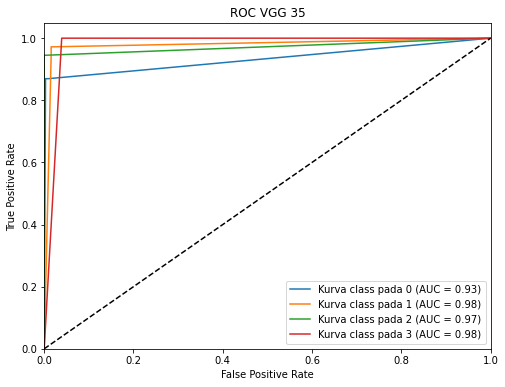

In [42]:
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_vgg35[i], tpr_vgg35[i], label=f'Kurva class pada {i} (AUC = {roc_auc_vgg35[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC VGG 35')
plt.legend(loc='lower right')
plt.show()

In [43]:
y_pred_le_35 = model_lenet_35.predict(x_test)

fpr_le35 = dict()
tpr_le35 = dict()
auc_le35 = dict()
for i in range(4):
    fpr_le35[i], tpr_le35[i], _ = roc_curve(y_test_2[:, i], y_pred_le_35[:, i])
    auc_le35[i] = trapezoid_rule(fpr_le35[i], tpr_le35[i])

12/12 [==============================] - 0s 6ms/step


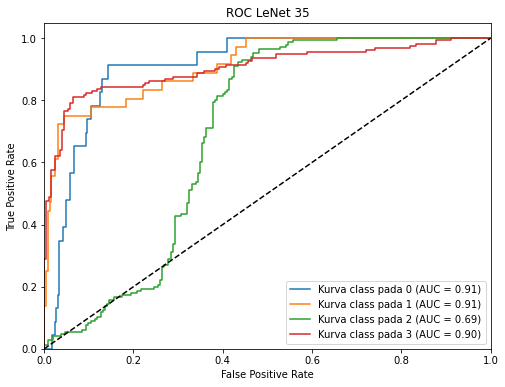

In [44]:
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_le35[i], tpr_le35[i], label=f'Kurva class pada {i} (AUC = {auc_le35[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LeNet 35')
plt.legend(loc='lower right')
plt.show()

In [45]:
y_pred_vgg_50 = model_vgg_50.predict(x_test)
fpr_vgg50 = dict()
tpr_vgg50 = dict()
auc_vgg50 = dict()
for i in range(4):
    fpr_vgg50[i], tpr_vgg50[i], _ = roc_curve(y_test_2[:, i], y_pred_vgg_50[:, i])
    auc_vgg50[i] = trapezoid_rule(fpr_vgg50[i], tpr_vgg50[i])

12/12 [==============================] - 0s 33ms/step


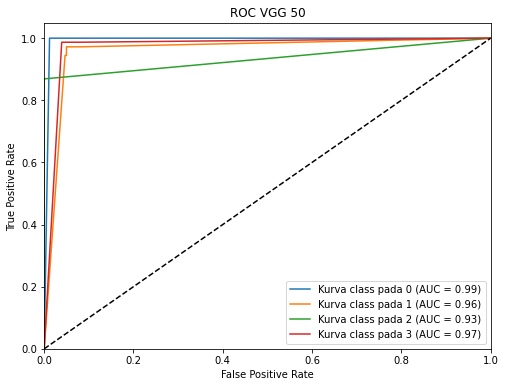

In [46]:
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_vgg50[i], tpr_vgg50[i], label=f'Kurva class pada {i} (AUC = {auc_vgg50[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC VGG 50')
plt.legend(loc='lower right')
plt.show()

In [47]:
y_pred_le_50 = model_lenet_50.predict(x_test)

fpr_le50 = dict()
tpr_le50 = dict()
auc_le50 = dict()
for i in range(4):
    fpr_le50[i], tpr_le50[i], _ = roc_curve(y_test_2[:, i], y_pred_le_50[:, i])
    auc_le50[i] = trapezoid_rule(fpr_le50[i], tpr_le50[i])

12/12 [==============================] - 0s 6ms/step


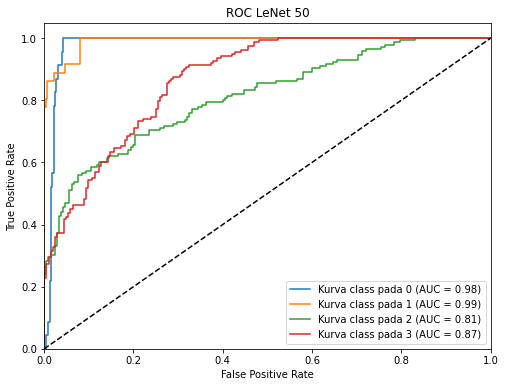

In [48]:
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_le50[i], tpr_le50[i], label=f'Kurva class pada {i} (AUC = {auc_le50[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LeNet 50')
plt.legend(loc='lower right')
plt.show()

In [49]:
y_pred_vgg_100 = model_vgg_100.predict(x_test)

fpr_vgg100 = dict()
tpr_vgg100 = dict()
auc_vgg100 = dict()
for i in range(4):
    fpr_vgg100[i], tpr_vgg100[i], _ = roc_curve(y_test_2[:, i], y_pred_vgg_100[:, i])
    auc_vgg100[i] = trapezoid_rule(fpr_vgg100[i], tpr_vgg100[i])

12/12 [==============================] - 0s 31ms/step


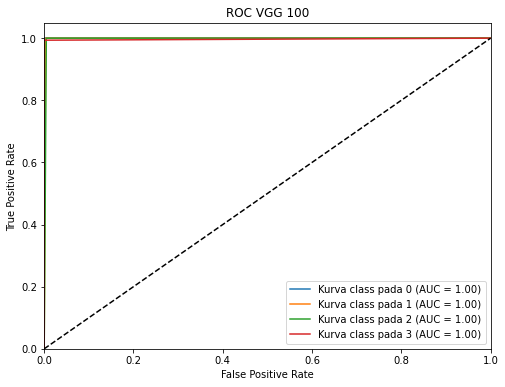

In [50]:
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_vgg100[i], tpr_vgg100[i], label=f'Kurva class pada {i} (AUC = {auc_vgg100[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC VGG 100')
plt.legend(loc='lower right')
plt.show()

In [51]:
y_pred_le_100 = model_lenet_100.predict(x_test)

fpr_le100 = dict()
tpr_le100 = dict()
auc_le100 = dict()
for i in range(4):
    fpr_le100[i], tpr_le100[i], _ = roc_curve(y_test_2[:, i], y_pred_le_100[:, i])
    auc_le100[i] = trapezoid_rule(fpr_le100[i], tpr_le100[i])

12/12 [==============================] - 0s 6ms/step


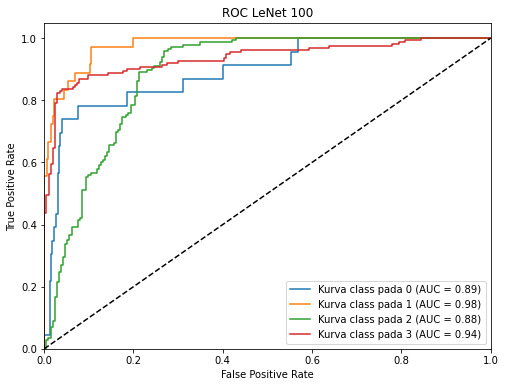

In [52]:
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(fpr_le100[i], tpr_le100[i], label=f'Kurva class pada {i} (AUC = {auc_le100[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LeNet 100')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model_vgg_50)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)